<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***

# Exercises
Do your work for this exercise in a jupyter notebook named `feature_engineering` within the `regression-exercises` repo. Add, commit, and push your work.

> ||__---PLACES TO GO---__||
> 1. [__--Load Tips Data--__](#1)
>  - [__--Model Prep--__](#mod_prep)
>  - [__1. Create a column named price_per_person__](#ppp)
>  - [__2. Which features, most important for predicting the tip amount?__](#pred_tips)
>  - [__3. Use select k best to select the top 2 features__](#SELECT_K2)
>  - [__4. Use recursive feature elimination to select the top 2 features__](#RFE_TOP2)
>  - [__5. Why do you think select k best and RFE are different?__](#1_5)
> 2. [__--def select_kbest():--__](#2)
> 3. [__--def rfe():--__](#3)
> 4. [__--Load Swiss Data--__](#4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, \
RFE, f_regression, SequentialFeatureSelector 

from sklearn.linear_model import LinearRegression

<a id="1"> </a>
<div class="alert alert-block alert-info">
</div>

***

1. __Load the `tips` dataset.__

***
[__--TOP--__](#TOP)

In [2]:
from pydataset import data

In [3]:
help(data)

Help on function data in module pydataset:

data(item=None, show_doc=False)
    loads a datasaet (from in-modules datasets) in a dataframe data structure.
    
    Args:
        item (str)      : name of the dataset to load.
        show_doc (bool) : to show the dataset's documentation.
    
    Examples:
    
    >>> iris = data('iris')
    
    
    >>> data('titanic', show_doc=True)
        : returns the dataset's documentation.
    
    >>> data()
        : like help(), returns a dataframe [Item, Title]
        for a list of the available datasets.



In [4]:
data('tips', show_doc=True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [5]:
df = data('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


<a id='ppp'></a>
>  __1. Create a column named `price_per_person`. This should be the total bill divided by the party size.__

In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
for col in df[['sex', 'smoker', 'day', 'time', 'size']]:
    print(df[col].value_counts(dropna=False))

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


In [8]:
df['price_per_person'] = df.total_bill / df['size']
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,9.676667
241,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000
242,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000
243,17.82,1.75,Male,No,Sat,Dinner,2,8.910000


<a id='pred_tips'></a>
>  __2. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?__

In [28]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person'],
      dtype='object')

In [9]:
from prepare import split_data_continuous


In [10]:
df.price_per_person = round(df.price_per_person,2)

In [11]:
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45
3,21.01,3.50,Male,No,Sun,Dinner,3,7.00
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84
5,24.59,3.61,Female,No,Sun,Dinner,4,6.15
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,9.68
241,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59
242,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34
243,17.82,1.75,Male,No,Sat,Dinner,2,8.91


In [12]:
train, validate, test = split_data_continuous(df)

Prepared df: (244, 8)

Train: (146, 8)
Validate: (49, 8)
Test: (49, 8)


In [13]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person'],
      dtype='object')

# Explore X_cols

In [15]:
X_cols = ['total_bill','sex', 'smoker', 'day', 'time', 'size',
       'price_per_person']
y_col = ['tip']

In [16]:
X_train = train[X_cols]
y_train = train[y_col]

X_validate = validate[X_cols]
y_validate = validate[y_col]

X_test = test[X_cols]
y_test = test[y_col]

In [17]:
len(X_train.columns)

7

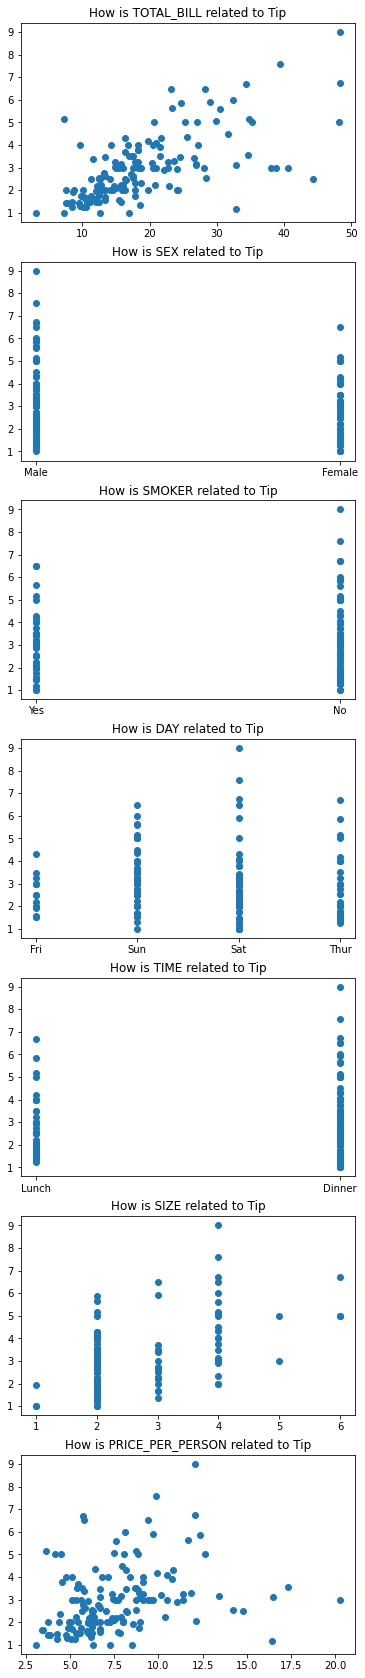

In [29]:
# plot_number = 1
plt.figure(figsize=(6,30))
num_plots = len(X_train.columns)
for plot_number, col in enumerate(X_train):
#     print(type(col),col)
    plt.subplot(num_plots,1,plot_number+1)
    plt.scatter(#data=train, 
                x= train[col],
                y= train.tip,
               )
    plt.title(f'How is {col.upper()} related to Tip')

<a id="mod_prep"></a>
<div class="alert alert-block alert-info">
    MODEL PREP
</div> 

In [30]:
dfm = df

In [31]:
dfm.sex = df.sex.map({'Male': 1,
            'Female': 0
           })


In [32]:
dfm.smoker = df.smoker.map({'No': 0,
                           'Yes': 1
                          })

In [33]:
dfm.time = df.time.map({'Lunch': 0,
            'Dinner': 1
           })

In [ ]:
dfm = pd.get_dummies(df, columns=['day'], drop_first=True)

In [46]:
dfm = pd.get_dummies(dfm, columns=['size'], drop_first=True)

In [47]:
dfm

,total_bill,tip,sex,smoker,time,price_per_person,day_Sat,day_Sun,day_Thur,size_2,size_3,size_4,size_5,size_6
1,16.99,1.01,0,0,1,8.49,0,1,0,1,0,0,0,0
2,10.34,1.66,1,0,1,3.45,0,1,0,0,1,0,0,0
3,21.01,3.50,1,0,1,7.00,0,1,0,0,1,0,0,0
4,23.68,3.31,1,0,1,11.84,0,1,0,1,0,0,0,0
5,24.59,3.61,0,0,1,6.15,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,1,0,1,9.68,1,0,0,0,1,0,0,0
241,27.18,2.00,0,1,1,13.59,1,0,0,1,0,0,0,0
242,22.67,2.00,1,1,1,11.34,1,0,0,1,0,0,0,0
243,17.82,1.75,1,0,1,8.91,1,0,0,1,0,0,0,0


In [48]:
train, validate, test = split_data_continuous(dfm)

Prepared df: (244, 14)

Train: (146, 14)
Validate: (49, 14)
Test: (49, 14)


# Model X_cols:

In [51]:
X_cols = ['total_bill', 'sex', 'smoker', 'time',
       'price_per_person', 'day_Sat', 'day_Sun', 'day_Thur',
         'size_2', 'size_3', 'size_4', 'size_5', 'size_6']
y_col = ['tip']

In [56]:
X_train = train[X_cols]
y_train = train.tip

X_validate = validate[X_cols]
y_validate = validate.tip

X_test = test[X_cols]
y_test = test.tip

In [53]:
X_train

,total_bill,sex,smoker,time,price_per_person,day_Sat,day_Sun,day_Thur,size_2,size_3,size_4,size_5,size_6
225,13.42,1,1,0,6.71,0,0,0,1,0,0,0,0
182,23.33,1,1,1,11.66,0,1,0,1,0,0,0,0
103,44.30,0,1,1,14.77,1,0,0,0,1,0,0,0
165,17.51,0,1,1,8.76,0,1,0,1,0,0,0,0
74,25.28,0,1,1,12.64,1,0,0,1,0,0,0,0
175,16.82,1,1,1,8.41,0,1,0,1,0,0,0,0
4,23.68,1,0,1,11.84,0,1,0,1,0,0,0,0
150,7.51,1,0,0,3.76,0,0,1,1,0,0,0,0
86,34.83,0,0,0,8.71,0,0,1,0,0,1,0,0
41,16.04,1,0,1,5.35,1,0,0,0,1,0,0,0


In [57]:
y_train

225    1.58
182    5.65
103    2.50
165    3.00
74     5.00
175    4.00
4      3.31
150    2.00
86     5.17
41     2.24
19     3.50
173    5.15
119    1.80
29     4.30
238    1.17
208    3.00
184    6.50
61     3.21
42     2.54
161    3.50
98     1.50
71     1.97
244    3.00
177    2.00
141    3.50
180    3.55
12     5.00
109    3.76
237    1.00
76     1.25
120    2.92
223    1.92
24     7.58
130    2.18
101    2.50
236    1.25
148    1.63
45     5.60
35     3.27
133    1.50
44     1.32
192    4.19
144    5.00
243    1.75
94     4.30
166    3.48
193    2.56
99     3.00
153    2.74
179    4.00
178    2.00
125    2.52
77     3.08
33     3.00
228    3.00
70     2.09
117    5.07
227    2.00
27     2.00
136    1.25
48     6.00
215    6.50
102    3.00
221    2.20
155    2.00
95     3.25
75     2.20
213    9.00
233    3.39
31     1.45
11     1.71
138    2.00
147    1.36
39     2.31
23     2.23
219    1.44
85     2.03
57     3.00
185    3.00
64     3.76
191    1.50
202    2.01
55     4.34
79  

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 225 to 167
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        146 non-null    float64
 1   sex               146 non-null    int64  
 2   smoker            146 non-null    int64  
 3   time              146 non-null    int64  
 4   price_per_person  146 non-null    float64
 5   day_Sat           146 non-null    uint8  
 6   day_Sun           146 non-null    uint8  
 7   day_Thur          146 non-null    uint8  
 8   size_2            146 non-null    uint8  
 9   size_3            146 non-null    uint8  
 10  size_4            146 non-null    uint8  
 11  size_5            146 non-null    uint8  
 12  size_6            146 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 8.0 KB


<a id='SELECT_K2'></a>
>  __3. Use select k best to select the top 2 features for predicting tip amount. What are they?__

***
[__--TOP--__](#TOP)

Docstring:     
Select features according to the k highest scores.

Read more in the :ref:`User Guide <univariate_feature_selection>`.

Parameters
----------
score_func : callable, default=f_classif
    Function taking two arrays X and y, and returning a pair of arrays
    (scores, pvalues) or a single array with scores.
    Default is f_classif (see below "See Also"). The default function only
    works with classification tasks.

    .. versionadded:: 0.18

k : int or "all", default=10
    Number of top features to select.
    The "all" option bypasses selection, for use in a parameter search.

Attributes
----------
scores_ : array-like of shape (n_features,)
    Scores of features.

pvalues_ : array-like of shape (n_features,)
    p-values of feature scores, None if `score_func` returned only scores.

n_features_in_ : int
    Number of features seen during :term:`fit`.

    .. versionadded:: 0.24

feature_names_in_ : ndarray of shape (`n_features_in_`,)
    Names of features seen during :term:`fit`. Defined only when `X`
    has feature names that are all strings.

    .. versionadded:: 1.0

In [67]:
# Make the kbest selector for regression and k=2
kbest2 = SelectKBest(f_regression, k=2)

# fit the selector
_2 = kbest2.fit(X_train, y_train)

In [68]:
kbest2_results = pd.DataFrame(
    dict(score= kbest2.scores_, p_value=kbest2.pvalues_),
    index=X_train.columns
)
kbest2_results

,score,p_value
total_bill,111.115028,1.305620e-19
sex,0.596049,4.413546e-01
smoker,0.084507,7.716981e-01
time,2.189558,1.411336e-01
price_per_person,13.835642,2.851877e-04
day_Sat,0.025013,8.745567e-01
day_Sun,3.285602,7.197303e-02
day_Thur,0.978682,3.241839e-01
size_2,25.305655,1.435291e-06
size_3,0.000623,9.801179e-01


In [69]:
X_train.columns[kbest2.get_support()]

Index(['total_bill', 'size_4'], dtype='object')

In [70]:
kbest4 = SelectKBest(f_regression, k=4)

# fit the selector
_4 = kbest4.fit(X_train, y_train)

In [71]:
kbest4.get_feature_names_out()

array(['total_bill', 'price_per_person', 'size_2', 'size_4'], dtype=object)

In [77]:
train_kb4 = X_train[kbest4.get_feature_names_out()]

In [107]:
train_my_kb4 = X_train[['total_bill', 'size_2', 'size_4', 'size_6']]

<a id='RFE_TOP2'> </a>
>  __4. Use recursive feature elimination to select the top 2 features for tip amount. What are they?__

***
[__--TOP--__](#TOP)

In [79]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [81]:
# Save the Recursive Feature Elimination with the model inside, and n features to select
rfe = RFE(lm, n_features_to_select=2)

# fit it
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [83]:
rfe.ranking_

array([ 6,  4, 11, 12,  8,  5,  9,  3,  7, 10,  1,  2,  1])

In [85]:
rfe_ranks = pd.DataFrame(
{
    'rfe_ranking': rfe.ranking_
}, index= X_train.columns)

rfe_ranks

,rfe_ranking
total_bill,6
sex,4
smoker,11
time,12
price_per_person,8
day_Sat,5
day_Sun,9
day_Thur,3
size_2,7
size_3,10


In [114]:
all_results = pd.DataFrame.join(kbest2_results, rfe_ranks)
all_results

,score,p_value,rfe_ranking
total_bill,111.115028,1.305620e-19,6
sex,0.596049,4.413546e-01,4
smoker,0.084507,7.716981e-01,11
time,2.189558,1.411336e-01,12
price_per_person,13.835642,2.851877e-04,8
day_Sat,0.025013,8.745567e-01,5
day_Sun,3.285602,7.197303e-02,9
day_Thur,0.978682,3.241839e-01,3
size_2,25.305655,1.435291e-06,7
size_3,0.000623,9.801179e-01,10


In [103]:
rfe.score(X_train, y_train)

0.27084525405947557

<a id="1_5"></a>
>  __5. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?__
***
[__--TOP--__](#TOP)

#  Fᵤ€K if I know...

In [108]:
# Save the Recursive Feature Elimination with the model inside, and n features to select
rfe4 = RFE(lm, n_features_to_select=4)

# fit it
rfe4.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [109]:
rfe4.ranking_

array([ 4,  2,  9, 10,  6,  3,  7,  1,  5,  8,  1,  1,  1])

In [116]:
rfe4_ranks = pd.DataFrame(
{
    'rfe4_ranking': rfe4.ranking_
}, index= X_train.columns)

rfe4_ranks

,rfe4_ranking
total_bill,4
sex,2
smoker,9
time,10
price_per_person,6
day_Sat,3
day_Sun,7
day_Thur,1
size_2,5
size_3,8


In [118]:
all_results = pd.DataFrame.join(all_results, rfe4_ranks)

In [119]:
all_results

,score,p_value,rfe_ranking,rfe4_ranking
total_bill,111.115028,1.305620e-19,6,4
sex,0.596049,4.413546e-01,4,2
smoker,0.084507,7.716981e-01,11,9
time,2.189558,1.411336e-01,12,10
price_per_person,13.835642,2.851877e-04,8,6
day_Sat,0.025013,8.745567e-01,5,3
day_Sun,3.285602,7.197303e-02,9,7
day_Thur,0.978682,3.241839e-01,3,1
size_2,25.305655,1.435291e-06,7,5
size_3,0.000623,9.801179e-01,10,8


In [103]:
rfe4.score(X_train, y_train)

0.27084525405947557

In [132]:
rfe4.get_feature_names_out()

array(['day_Thur', 'size_4', 'size_5', 'size_6'], dtype=object)

<a id="2"> </a>
<div class="alert alert-block alert-info">
</div>

***

2. __Write a function named `select_kbest` that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the `SelectKBest` class. Test your function with the `tips` dataset. You should see the same results as when you did the process manually.__

***
[__--TOP--__](#TOP)

In [168]:
def select_kbest(X, y, k=2):
    '''
    Select K Best:
    --------------
    
    Parameters:
    ______________
    X : NDFrame, array like should be a scaled and ready 
    for feature selection/modeling (X_train)
    
    y : Series, your target variable (y_train)
    
    k : (=2) the k number of best feature variables that you want
    
    Returns:
    --------------
    List of columns for your X_train
    
    Easily used: X_train[select_kbest(X_train, y_train, k=2)]
    '''
    # Make the kbest selector for regression and k=2
    kbest = SelectKBest(f_regression, k=k)

    # fit the selector
    _ = kbest.fit(X, y)
    
    
    kbest_cols = X.columns[kbest.get_support()].tolist()
    
    return kbest_cols

In [122]:
X_train

,total_bill,sex,smoker,time,price_per_person,day_Sat,day_Sun,day_Thur,size_2,size_3,size_4,size_5,size_6
225,13.42,1,1,0,6.71,0,0,0,1,0,0,0,0
182,23.33,1,1,1,11.66,0,1,0,1,0,0,0,0
103,44.30,0,1,1,14.77,1,0,0,0,1,0,0,0
165,17.51,0,1,1,8.76,0,1,0,1,0,0,0,0
74,25.28,0,1,1,12.64,1,0,0,1,0,0,0,0
175,16.82,1,1,1,8.41,0,1,0,1,0,0,0,0
4,23.68,1,0,1,11.84,0,1,0,1,0,0,0,0
150,7.51,1,0,0,3.76,0,0,1,1,0,0,0,0
86,34.83,0,0,0,8.71,0,0,1,0,0,1,0,0
41,16.04,1,0,1,5.35,1,0,0,0,1,0,0,0


In [129]:
X_train[select_kbest(X_train, y_train, 2)]

,total_bill,size_4
225,13.42,0
182,23.33,0
103,44.30,0
165,17.51,0
74,25.28,0
175,16.82,0
4,23.68,0
150,7.51,0
86,34.83,1
41,16.04,0


In [130]:
X_train[select_kbest(X_train, y_train, 4)]

,total_bill,price_per_person,size_2,size_4
225,13.42,6.71,1,0
182,23.33,11.66,1,0
103,44.30,14.77,0,0
165,17.51,8.76,1,0
74,25.28,12.64,1,0
175,16.82,8.41,1,0
4,23.68,11.84,1,0
150,7.51,3.76,1,0
86,34.83,8.71,0,1
41,16.04,5.35,0,0


<a id="3"> </a>
<div class="alert alert-block alert-info">
</div>

***

3. __Write a function named `rfe` that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the `RFE` class. Test your function with the `tips` dataset. You should see the same results as when you did the process manually.__
***
[__--TOP--__](#TOP)

In [137]:
del rfe

In [148]:
def rfe(X, y, n=2):
    '''
    Select RFE:
    --------------
    
    Parameters:
    ______________
    X : NDFrame, array like should be a scaled and ready 
    for feature selection/modeling (X_train)
    
    y : Series, your target variable (y_train)
    
    n : (=2) the n number of best feature variables that you want from RFE
    
    Returns:
    --------------
    List of columns for your X_train
    
    Easily used: X_train[rfe(X_train, y_train, n=2)]
    
    '''
    
    from sklearn.linear_model import LinearRegression

    lm = LinearRegression()
    
    # Save the Recursive Feature Elimination with the model inside, and n features to select
    rfes = RFE(lm, n_features_to_select=n)

    # fit it
    rfes.fit(X, y)
    
    return rfes.get_feature_names_out()

In [141]:
rfe(X_train, y_train, 2)

array(['size_4', 'size_6'], dtype=object)

In [142]:
X_train[rfe(X_train, y_train, 2)]

,size_4,size_6
225,0,0
182,0,0
103,0,0
165,0,0
74,0,0
175,0,0
4,0,0
150,0,0
86,1,0
41,0,0


In [143]:
X_train[rfe(X_train, y_train, 5)]

,sex,day_Thur,size_4,size_5,size_6
225,1,0,0,0,0
182,1,0,0,0,0
103,0,0,0,0,0
165,0,0,0,0,0
74,0,0,0,0,0
175,1,0,0,0,0
4,1,0,0,0,0
150,1,1,0,0,0
86,0,1,1,0,0
41,1,0,0,0,0


<a id="4"> </a>
<div class="alert alert-block alert-info">
</div>

***

4. __Load the `swiss` dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).__
***
[__--TOP--__](#TOP)

In [145]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [149]:
df_swiss = data('swiss')

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
X_cols_swiss = ['Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality']
# df_swiss.columns
y_col_swiss = 'Fertility'

In [154]:
train_swiss, validate_swiss, test_swiss = split_data_continuous(df_swiss)

Prepared df: (47, 6)

Train: (27, 6)
Validate: (10, 6)
Test: (10, 6)


In [155]:
X_train_swiss = train_swiss[X_cols_swiss]
y_train_swiss = train_swiss.Fertility

X_validate_swiss = validate_swiss[X_cols_swiss]
y_validate_swiss = validate_swiss.Fertility

X_test_swiss = test_swiss[X_cols_swiss]
y_test_swiss = test_swiss.Fertility

In [159]:
minmax_cols = []
for col in X_train_swiss:
    minmax_cols.append(f'{col}_minmax')

minmax_cols

['Agriculture_minmax',
 'Examination_minmax',
 'Education_minmax',
 'Catholic_minmax',
 'Infant.Mortality_minmax']

In [161]:
X_train_swiss[minmax_cols] = swiss_scaler.fit_transform(X_train_swiss)

In [156]:
swiss_scaler = MinMaxScaler()

swiss_scaler.fit_transform(X_train_swiss)

array([[0.47439024, 0.40625   , 0.90322581, 0.49278625, 0.31632653],
       [0.72926829, 0.34375   , 0.19354839, 0.        , 0.40816327],
       [0.64756098, 0.40625   , 0.29032258, 0.05576589, 0.12244898],
       [0.79634146, 0.5       , 0.25806452, 0.0058324 , 0.5       ],
       [0.52682927, 0.59375   , 0.35483871, 0.13168935, 0.16326531],
       [0.95365854, 0.        , 0.03225806, 0.99703264, 0.        ],
       [0.5097561 , 0.375     , 0.22580645, 0.0391896 , 0.75510204],
       [0.77439024, 0.28125   , 0.        , 0.0013302 , 0.60204082],
       [0.75121951, 0.59375   , 0.12903226, 0.00562775, 0.36734694],
       [0.83170732, 0.1875    , 0.25806452, 0.99038166, 0.2755102 ],
       [0.3902439 , 0.0625    , 0.12903226, 0.932467  , 0.52040816],
       [0.56585366, 0.53125   , 0.16129032, 0.01974829, 0.02040816],
       [0.45731707, 0.40625   , 0.38709677, 0.91179781, 0.94897959],
       [0.        , 0.8125    , 0.32258065, 0.11787578, 0.55102041],
       [0.12073171, 1.        , 1.

In [162]:
X_train_swiss

,Agriculture,Examination,Education,Catholic,Infant.Mortality,Agriculture_minmax,Examination_minmax,Education_minmax,Catholic_minmax,Infant.Mortality_minmax
Rive Droite,46.6,16,29,50.43,18.2,0.474390,0.40625,0.903226,0.492786,0.316327
Aubonne,67.5,14,7,2.27,19.1,0.729268,0.34375,0.193548,0.000000,0.408163
Rolle,60.8,16,10,7.72,16.3,0.647561,0.40625,0.290323,0.055766,0.122449
Lavaux,73.0,19,9,2.84,20.0,0.796341,0.50000,0.258065,0.005832,0.500000
Nyone,50.9,22,12,15.14,16.7,0.526829,0.59375,0.354839,0.131689,0.163265
Conthey,85.9,3,2,99.71,15.1,0.953659,0.00000,0.032258,0.997033,0.000000
Yverdon,49.5,15,8,6.10,22.5,0.509756,0.37500,0.225806,0.039190,0.755102
Oron,71.2,12,1,2.40,21.0,0.774390,0.28125,0.000000,0.001330,0.602041
Cossonay,69.3,22,5,2.82,18.7,0.751220,0.59375,0.129032,0.005628,0.367347
St Maurice,75.9,9,9,99.06,17.8,0.831707,0.18750,0.258065,0.990382,0.275510


In [169]:
# select_kbest()

X_train_swiss[select_kbest(X_train_swiss[minmax_cols], y_train_swiss, k=2)]

# X_train_swiss[minmax_cols]

# select_kbest(X_train_swiss[minmax_cols], y_train_swiss, k=2)

,Examination_minmax,Catholic_minmax
Rive Droite,0.40625,0.492786
Aubonne,0.34375,0.000000
Rolle,0.40625,0.055766
Lavaux,0.50000,0.005832
Nyone,0.59375,0.131689
Conthey,0.00000,0.997033
Yverdon,0.37500,0.039190
Oron,0.28125,0.001330
Cossonay,0.59375,0.005628
St Maurice,0.18750,0.990382


In [170]:
X_train_swiss[rfe(X_train_swiss, y_train_swiss, 2)]

,Examination,Infant.Mortality
Rive Droite,16,18.2
Aubonne,14,19.1
Rolle,16,16.3
Lavaux,19,20.0
Nyone,22,16.7
Conthey,3,15.1
Yverdon,15,22.5
Oron,12,21.0
Cossonay,22,18.7
St Maurice,9,17.8


In [171]:
X_train_swiss[rfe(X_train_swiss[minmax_cols], y_train_swiss, 2)]

,Examination_minmax,Infant.Mortality_minmax
Rive Droite,0.40625,0.316327
Aubonne,0.34375,0.408163
Rolle,0.40625,0.122449
Lavaux,0.50000,0.500000
Nyone,0.59375,0.163265
Conthey,0.00000,0.000000
Yverdon,0.37500,0.755102
Oron,0.28125,0.602041
Cossonay,0.59375,0.367347
St Maurice,0.18750,0.275510


# FINAL CELL
***
[__--TOP--__](#TOP)
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>